In [2]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statistics import stdev
import statistics

In [18]:
import numpy as np

# Percentual amount of unique vocab
models = [0,1,2,3,4,5,6,7,8,9]
scoresNorm = np.gradient(df.evalScore)
vocNorm = np.gradient(df.vocUnique)

p = figure(title="Training Part 3: Influence of corpus size")
p.xaxis.axis_label = "percentual amount of unique vocab"
p.yaxis.axis_label = "Eval score"

p.line(x=models, y=scoresNorm, color="blue")
p.line(x=models, y=vocNorm, color="red")

show(p)

In [3]:
import glob
import pandas as pd
#from collections import Counter

In [4]:
pathData = "/home/hiwi/Dokumente/masterthesis/data/corpora/"
corpora = glob.glob(pathData+"*.txt")
len(corpora)

11

In [5]:
corpora = ['/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent10.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent20.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent30.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent40.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent50.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent60.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent70.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent80.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent90.txt',
 '/home/hiwi/Dokumente/masterthesis/data/corpora/corpus_percent100.txt']

In [6]:
# Terms
pathTerms = "/home/hiwi/Dokumente/masterthesis/data/terminology/eval_intrinsic_part3_2Terms.csv"
terms = open(pathTerms, "r").readlines()

for i in range(0,len(terms)):
    terms[i] = terms[i].replace("\n", "")
len(terms)

410

In [7]:
colnames = ["copusSize", "evalScore", "vocCount", "vocUnique"]
colnames = colnames + terms
len(colnames)

414

In [21]:
df = pd.DataFrame(columns=colnames)

In [22]:
percentage = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = [0.3576271186440678,
 0.5220338983050847,
 0.6338983050847458,
 0.6898305084745763,
 0.7084745762711865,
 0.7322033898305085,
 0.7491525423728813,
 0.7576271186440678,
 0.7728813559322034,
 0.7745762711864407]

for i in range(0, len(corpora)):
    newRow = []
    newRow.append(percentage[i]) # Corpus size
    newRow.append(scores[i]) # eval score

    corpus = open(corpora[i], "r").readlines()
    text = " ".join(corpus)
    text = text.replace("\n", "")
    words = text.split()
    newRow.append(int(len(words))) # voc count
    newRow.append(int(len(set(words)))) # voc count unique

    for term in terms:
        newRow.append(int(words.count(term)))

    df.loc[i] = newRow

In [24]:
df

,copusSize,evalScore,vocCount,vocUnique,acceleration,yaw,yaw_rate,yaw_velocity,lateral_acceleration,velocity,...,warn,emergency_situation,inform,alarm,lane_departure,alert,wheel,roll,rotation,wordAppearanceMean
0,0.1,0.357627,213276.0,2297.0,176.0,33.0,27.0,13.0,34.0,151.0,...,94.0,8.0,22.0,22.0,13.0,14.0,933.0,90.0,55.0,84.739024
1,0.2,0.522034,424483.0,2687.0,379.0,60.0,47.0,28.0,85.0,334.0,...,183.0,14.0,35.0,35.0,16.0,22.0,1803.0,162.0,108.0,167.397561
2,0.3,0.633898,638376.0,2956.0,561.0,92.0,63.0,42.0,144.0,492.0,...,274.0,19.0,49.0,48.0,18.0,49.0,2696.0,242.0,154.0,253.214634
3,0.4,0.689831,853232.0,3177.0,777.0,131.0,85.0,59.0,199.0,680.0,...,373.0,24.0,63.0,52.0,23.0,60.0,3562.0,323.0,189.0,340.090244
4,0.5,0.708475,1066713.0,3333.0,971.0,145.0,105.0,66.0,243.0,844.0,...,481.0,33.0,75.0,65.0,25.0,84.0,4586.0,380.0,235.0,427.121951
5,0.6,0.732203,1279878.0,3471.0,1184.0,171.0,118.0,72.0,275.0,1020.0,...,622.0,35.0,86.0,75.0,31.0,101.0,5585.0,461.0,287.0,514.221951
6,0.7,0.749153,1493795.0,3589.0,1371.0,194.0,135.0,97.0,318.0,1176.0,...,811.0,39.0,99.0,84.0,40.0,117.0,6501.0,523.0,350.0,603.765854
7,0.8,0.757627,1710208.0,3691.0,1605.0,227.0,154.0,107.0,367.0,1362.0,...,923.0,45.0,110.0,88.0,46.0,131.0,7421.0,720.0,392.0,692.209756
8,0.9,0.772881,1928204.0,3773.0,1782.0,308.0,170.0,113.0,409.0,1514.0,...,999.0,49.0,128.0,107.0,54.0,140.0,8683.0,807.0,442.0,783.565854
9,1.0,0.774576,2143809.0,3864.0,1990.0,331.0,192.0,124.0,457.0,1657.0,...,1172.0,53.0,144.0,112.0,63.0,161.0,9626.0,877.0,492.0,872.456098


In [78]:
df.shape

(10, 416)

In [23]:
df["wordAppearanceMean"] = df.iloc[:, 4:].mean(axis=1)
#df["wordAppearanceStdv"] = df.iloc[:, 4:].std(axis=1)

In [47]:
pearsonr(df.copusSize, df.wordAppearanceMean)

(0.9999332472604354, 8.685996394332542e-17)

In [49]:
pearsonr(df.copusSize, df.vocUnique)

(0.9666689176313068, 5.186784500525215e-06)

In [73]:
pearsonr(df.wordAppearanceMean, df.evalScore)

(0.8601672127714154, 0.0014080359051272839)

In [75]:
r = []
p = []

for col in df.columns[4:]:
    pearson = pearsonr(df.copusSize, df[col]) 
    r.append(pearson[0])
    p.append(pearson[1])

In [80]:
statistics.mean(r)
max(r)

0.9999804456743555

In [69]:
r = []
p = []

for col in df.columns[4:]:
    pearson = pearsonr(df.evalScore, df[col]) 
    r.append(pearson[0])
    p.append(pearson[1])

In [74]:
statistics.mean(r)
#min(r)

0.8575215703650549

In [18]:
normalized_df = (df-df.min())/(df.max()-df.min())

In [19]:
normalized_df

,copusSize,evalScore,vocCount,vocUnique,acceleration,yaw,yaw_rate,yaw_velocity,lateral_acceleration,velocity,...,emergency_situation,inform,alarm,lane_departure,alert,wheel,roll,rotation,wordAppearanceStdv,wordAppearanceMean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.394309,0.109403,0.248883,0.111907,0.090604,0.121212,0.135135,0.120567,0.121514,...,0.133333,0.106557,0.144444,0.06,0.054422,0.100081,0.091487,0.121281,0.107775,0.104953
2,0.222222,0.662602,0.220198,0.420549,0.212238,0.197987,0.218182,0.261261,0.260047,0.226428,...,0.244444,0.221311,0.288889,0.10,0.238095,0.202807,0.193139,0.226545,0.217621,0.213903
3,0.333333,0.796748,0.331492,0.561583,0.331312,0.328859,0.351515,0.414414,0.390071,0.351262,...,0.355556,0.336066,0.333333,0.20,0.312925,0.302427,0.296061,0.306636,0.330979,0.324211
4,0.444444,0.841463,0.442073,0.661136,0.438258,0.375839,0.472727,0.477477,0.494090,0.460159,...,0.555556,0.434426,0.477778,0.24,0.476190,0.420223,0.368488,0.411899,0.439455,0.434684
5,0.555556,0.898374,0.552491,0.749202,0.555678,0.463087,0.551515,0.531532,0.569740,0.577025,...,0.600000,0.524590,0.588889,0.36,0.591837,0.535143,0.471410,0.530892,0.549296,0.545252
6,0.666667,0.939024,0.663298,0.824505,0.658765,0.540268,0.654545,0.756757,0.671395,0.680611,...,0.688889,0.631148,0.688889,0.54,0.700680,0.640515,0.550191,0.675057,0.663546,0.658931
7,0.777778,0.959350,0.775398,0.889598,0.787762,0.651007,0.769697,0.846847,0.787234,0.804117,...,0.822222,0.721311,0.733333,0.66,0.795918,0.746348,0.800508,0.771167,0.774474,0.771200
8,0.888889,0.995935,0.888318,0.941927,0.885336,0.922819,0.866667,0.900901,0.886525,0.905046,...,0.911111,0.868852,0.944444,0.82,0.857143,0.891522,0.911055,0.885584,0.888309,0.887162
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Correlations
pearsonr(df.copusSize, df.evalScore)
pearsonr(df.copusSize, df.wordAppearanceMean)
pearsonr(df.copusSize, df.vocUnique)

(0.9666689176313068, 5.186784500525215e-06)

### Graphs

In [17]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, show, output_file
output_notebook()
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import Span

Loading BokehJS ...

In [84]:
models = [1,2,3,4,5,6,7,8,9]
qty = [1, 0.5, 0.3, 0.25, 0.2, 0.167, 0.143, 0.125, 0.115]
score = [0.4597, 0.2143, 0.0882, 0.027, 0.0335, 0.0316, 0.0113, 0.0201, 0.0219]

p = figure()
p.line(x=models, y=qty, color="blue")
p.line(x=models, y=score, color="red")

show(p)

In [85]:
pearsonr(qty, score)

(0.9916092901664879, 1.7671944960457574e-07)

In [86]:
qty = [1, 0.5, 0.3, 0.25, 0.2, 0.167, 0.143, 0.125, 0.115]
score = [0.4597, 0.2143, 0.0882, 0.027, 0.0335, 0.0316, 0.0113, 0.0201, 0.0219]

p = figure()
p.line(x=qty, y=score, color="blue")

show(p)

In [22]:
# Percentual amount of unique vocab
amounts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

p = figure(title="Training Part 3: Influence of corpus size")
p.xaxis.axis_label = "Average appearance per word"
p.yaxis.axis_label = "Eval score"

p.line(x=df.wordAppearanceMean, y=df.evalScore, color="blue")
p.line(x=df.wordAppearanceMean, y=amounts, color="red")

show(p)

In [86]:
# Percentual amount of unique vocab
models = [0,1,2,3,4,5,6,7,8,9]
scoresNorm = normalized_df.evalScore
vocNorm = normalized_df.vocUnique

p = figure(title="Training Part 3: Influence of corpus size")
p.xaxis.axis_label = "percentual amount of unique vocab"
p.yaxis.axis_label = "Eval score"

p.line(x=models, y=scoresNorm, color="blue")
p.line(x=models, y=vocNorm, color="red")
#p.line(x=models, y=amountVocab, color="green")

show(p)

In [87]:
# Percentual amount of unique vocab
models = [0,1,2,3,4,5,6,7,8,9]

p = figure(title="Training Part 3: Influence of corpus size")
p.xaxis.axis_label = "percentual amount of unique vocab"
p.yaxis.axis_label = "Eval score"

p.line("vocUnique", "evalScore", source=normalized_df, color="green")

show(p)

In [87]:
import numpy as np

# Percentual amount of unique vocab
models = [0,1,2,3,4,5,6,7,8,9]
scoresNorm = np.gradient(normalized_df.evalScore)
vocUniqueNorm = np.gradient(normalized_df.vocUnique)
vocNorm = np.gradient(normalized_df.vocCount)
trainExampl = np.gradient(normalized_df.wordAppearanceMean)

p = figure(title="Training Part 3: Influence of corpus size")
p.xaxis.axis_label = "percentual amount of unique vocab"
p.yaxis.axis_label = "Eval score"

p.line(x=models, y=scoresNorm, color="blue")
p.line(x=models, y=vocUniqueNorm, color="red")
p.line(x=models, y=vocNorm, color="green")
p.line(x=models, y=trainExampl, color="orange")

show(p)

### Plots

In [44]:
pathTrain = "/home/hiwi/Dokumente/masterthesis/data/trained/"
pathEval = "/home/hiwi/Dokumente/masterthesis/data/eval/"
dataTrain = pd.read_csv(pathTrain+"02size_w2v_trainingLog_part3_12_01.csv", sep=";")
dataEval = pd.read_csv(pathEval+"results_part3_02b_12_01.csv", sep=";")
data = pd.concat([dataTrain, dataEval], axis=1, sort=False)
data = data.loc[:,~data.columns.duplicated()]

Text(0, 0.5, 'Gradient')

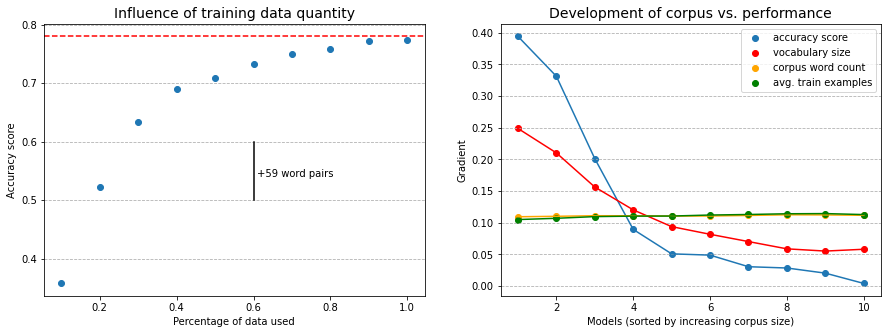

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Percentual amount of unique vocab
models = [1,2,3,4,5,6,7,8,9,10]
scoresNorm = np.gradient(normalized_df.evalScore)
vocUniqueNorm = np.gradient(normalized_df.vocUnique)
vocNorm = np.gradient(normalized_df.vocCount)
trainExampl = np.gradient(normalized_df.wordAppearanceMean)


fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=False)

ax[0].set_title('Influence of training data quantity', fontsize=14)
ax[0].scatter(data=data, x="percentage", y="evalScore")
ax[0].axhline(0.78, color="r", linestyle="--")
ax[0].grid(True, axis="y", linestyle="--")
ax[0].set_xlabel("Percentage of data used")
ax[0].set_ylabel("Accuracy score")
ax[0].plot([0.6, 0.6], [0.5, 0.6], color="k")
ax[0].text(0.61, 0.54, "+59 word pairs")

ax[1].set_title('Development of corpus vs. performance', fontsize=14)
ax[1].scatter(x=models, y=scoresNorm, label="accuracy score")
ax[1].plot(models, scoresNorm)
ax[1].scatter(x=models, y=vocUniqueNorm, color="r", label="vocabulary size")
ax[1].plot(models, vocUniqueNorm, color="r")
ax[1].scatter(x=models, y=vocNorm, color="orange", label="corpus word count")
ax[1].plot(models, vocNorm, color="orange")
ax[1].scatter(x=models, y=trainExampl, color="green", label="avg. train examples")
ax[1].plot(models, trainExampl, color="green")
ax[1].legend(loc="upper right")
ax[1].grid(True, axis="y", linestyle="--")
ax[1].set_xlabel("Models (sorted by increasing corpus size)")
ax[1].set_ylabel("Gradient")
